<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/CNN/blob/main/Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50

In [13]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [14]:
print(data_dir)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg


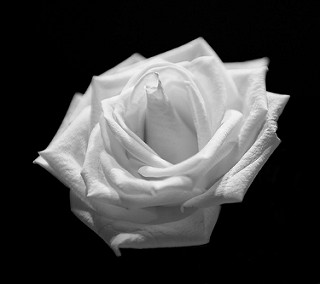

In [15]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [16]:
image_shape = (180,180)
batch_size = 32

datagen = ImageDataGenerator(validation_split=0.2)

train_ds = datagen.flow_from_directory(
    data_dir,
    subset='training',
    seed=123,
    class_mode = 'categorical',
    target_size=image_shape,
    batch_size=batch_size
                             )

val_ds = datagen.flow_from_directory(
    data_dir,
    subset='validation',
    seed=123,
    class_mode = 'categorical',
    target_size=image_shape,
    batch_size=batch_size
                                        )

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [17]:
class_names = train_ds.num_classes
print(class_names)

5


In [18]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(180,180,3),classes=class_names)

for layer in resnet.layers:
  layer.trainable = False

In [19]:
resnet_model = Sequential([
    Input(shape=(180,180,3)),
    resnet,
    Flatten(),
    Dense(512,activation='relu'),
    Dense(5,activation='softmax')
])

In [20]:
resnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 6, 6, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      37,749,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,339,525 (233.99 MB)

 Trainable params: 37,751,813 (144.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [21]:
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history = resnet_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 190ms/step - accuracy: 0.6236 - loss: 20.6716 - val_accuracy: 0.7442 - val_loss: 2.2021
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.9094 - loss: 0.5049 - val_accuracy: 0.8345 - val_loss: 1.0709
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9780 - loss: 0.0789 - val_accuracy: 0.8222 - val_loss: 1.3635
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.9937 - loss: 0.0203 - val_accuracy: 0.8345 - val_loss: 1.1771
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.8249 - val_loss: 1.2479
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 1.0000 - loss: 9.2308e-04 - val_accuracy: 0.8413 - val_loss: 1.2097
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 1.0000 - loss: 2.5187e-04 - val_accuracy: 0.8440 - val_loss: 1.2060
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 1.0000 - loss: 1.7890e-

In [24]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, image_shape)
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [25]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
[[4.5393891e-34 1.5946777e-42 1.0000000e+00 0.0000000e+00 1.2037343e-15]]


In [28]:

output_class=[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is [2]
